***Now we will look at the Happy Planet Index***


*First we will import the libraries and then the data from an excel spreadsheet.*


In [1]:
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [2]:
df_hpi = pd.read_excel(r'data/happy-planet-index-2006-2020-public-data-set.xlsx', sheet_name="All data")
print(df_hpi)

      HPI rank               Country  ISO  Continent Unnamed: 4  \
0          NaN           Afghanistan  AFG        6.0    2020AFG   
1         15.0               Albania  ALB        7.0    2020ALB   
2         84.0  United Arab Emirates  ARE        4.0    2020ARE   
3         41.0             Argentina  ARG        1.0    2020ARG   
4          NaN               Armenia  ARM        7.0    2020ARM   
...        ...                   ...  ...        ...        ...   
2294       NaN                  2017  NaN        NaN        NaN   
2295       NaN                  2018  NaN        NaN        NaN   
2296       NaN                  2019  NaN        NaN        NaN   
2297       NaN                  2020  NaN        NaN        NaN   
2298       NaN                  2030  NaN        NaN        NaN   

      Population (thousands)    Year  LifeExp (years)  Ladder of life (0-10)  \
0                  38928.341  2020.0        64.894261                    NaN   
1                   2877.800  2020.

In [3]:
df_hpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HPI rank                     1964 non-null   float64
 1   Country                      2297 non-null   object 
 2   ISO                          2280 non-null   object 
 3   Continent                    2280 non-null   float64
 4   Unnamed: 4                   2280 non-null   object 
 5   Population (thousands)       2280 non-null   float64
 6   Year                         2297 non-null   float64
 7   LifeExp (years)              2287 non-null   float64
 8   Ladder of life (0-10)        2036 non-null   float64
 9   Footprint (g ha)             2194 non-null   float64
 10  HPI                          1980 non-null   float64
 11  Biocapacity for year (g ha)  2280 non-null   float64
 12  GDP per capita ($)           1510 non-null   object 
dtypes: float64(9), obj

In [4]:
df_hpi.head()

,HPI rank,Country,ISO,Continent,Unnamed: 4,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,NaN,Afghanistan,AFG,6.0,2020AFG,38928.341,2020.0,64.894261,NaN,NaN,NaN,1.55,..
1,15.0,Albania,ALB,7.0,2020ALB,2877.800,2020.0,78.082782,5.364910,1.789761,54.336054,1.55,..
2,84.0,United Arab Emirates,ARE,4.0,2020ARE,9890.400,2020.0,77.788521,6.458392,7.878637,35.626946,1.55,..
3,41.0,Argentina,ARG,1.0,2020ARG,45195.777,2020.0,75.202650,5.900567,3.047550,48.439379,1.55,..
4,NaN,Armenia,ARM,7.0,2020ARM,2963.234,2020.0,73.988411,NaN,NaN,NaN,1.55,..


droping uninteresting columns, changing names to python convention (snakecase), renaming columns

In [6]:
df_hpi.columns


Index(['HPI rank', 'Country', 'ISO', 'Continent', 'Unnamed: 4',
       'Population (thousands)', 'Year', 'LifeExp (years)',
       'Ladder of life (0-10)', 'Footprint (g ha)', 'HPI',
       'Biocapacity for year (g ha)', 'GDP per capita ($)'],
      dtype='object')

In [8]:
df_hpi = df_hpi.drop(columns=['ISO', 'Unnamed: 4'])


In [9]:
df_hpi.head()

,HPI rank,Country,Continent,Population (thousands),Year,LifeExp (years),Ladder of life (0-10),Footprint (g ha),HPI,Biocapacity for year (g ha),GDP per capita ($)
0,NaN,Afghanistan,6.0,38928.341,2020.0,64.894261,NaN,NaN,NaN,1.55,..
1,15.0,Albania,7.0,2877.800,2020.0,78.082782,5.364910,1.789761,54.336054,1.55,..
2,84.0,United Arab Emirates,4.0,9890.400,2020.0,77.788521,6.458392,7.878637,35.626946,1.55,..
3,41.0,Argentina,1.0,45195.777,2020.0,75.202650,5.900567,3.047550,48.439379,1.55,..
4,NaN,Armenia,7.0,2963.234,2020.0,73.988411,NaN,NaN,NaN,1.55,..


In [12]:
df_hpi2 = df_hpi.copy()
#str(df2.columns).lower()
cols = df_hpi2.columns.tolist()
cols = [col.lower() for col in cols]
cols = [col.replace(' ', '_') for col in cols]


df_hpi2.columns = cols

In [13]:
df_hpi2.columns

Index(['hpi_rank', 'country', 'continent', 'population_(thousands)', 'year',
       'lifeexp_(years)', 'ladder_of_life_(0-10)', 'footprint_(g_ha)', 'hpi',
       'biocapacity_for_year_(g_ha)', 'gdp_per_capita_($)'],
      dtype='object')

In [15]:
df_hpi2 = df_hpi2.rename(columns={"lifeexp_(years)":"life_expectancy","hpi":"hpi_score","gdp_per_capita_($)":"gdp_per_capita_(us_dollar)"})

only interested in european countries

In [23]:
list_european_countries = ('Albania',
'Andorra',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Denmark',
'Germany',
'Estonia',
'Finland',
'France',
'Greece',
'Ireland',
'Iceland',
'Italy',
'Kazakhstan',
'Kosovo',
'Croatia',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Moldova',
'Monaco',
'Montenegro',
'Netherlands',
'North Macedonia',
'Norway',
'Austria',
'Poland',
'Portugal',
'Romania',
'Russia',
'San Marino',
'Sweden',
'Switzerland',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Czech Republic',
'Turkey',
'Ukraine',
'Hungary',
'Vatican',
'United Kingdom',
'Belarus')


In [24]:
df_hpi_europe = df_hpi2.loc[df_hpi2.country.isin(list_european_countries)]

In [25]:
df_hpi_europe

,hpi_rank,country,continent,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
1,15.0,Albania,7.0,2877.800,2020.0,78.082782,5.364910,1.789761,54.336054,1.55,..
6,34.0,Austria,3.0,9006.400,2020.0,80.800000,7.213489,5.234565,49.679029,1.55,..
9,40.0,Belgium,3.0,11589.616,2020.0,80.400000,6.838761,4.946098,48.608533,1.55,..
13,64.0,Bulgaria,7.0,6948.445,2020.0,73.500000,5.597723,3.413820,43.684355,1.55,..
15,50.0,Bosnia and Herzegovina,7.0,3280.815,2020.0,76.046965,5.515816,3.272816,45.561367,1.55,..
...,...,...,...,...,...,...,...,...,...,...,...
2268,NaN,Serbia,7.0,9145.913,2006.0,73.000000,NaN,3.192958,NaN,1.74,NaN
2269,NaN,Spain,3.0,44728.561,2006.0,80.800000,NaN,5.819135,NaN,1.74,NaN
2271,NaN,Sweden,3.0,9096.170,2006.0,80.800000,NaN,5.407468,NaN,1.74,NaN
2274,NaN,Turkey,4.0,68756.809,2006.0,72.800000,NaN,3.078762,NaN,1.74,NaN


only newest data: 2019 or 2020?

In [26]:
df_hpi_2019 = df_hpi_europe.loc[df_hpi_europe.year.isin({2019})]

In [27]:
df_hpi_2019

,hpi_rank,country,continent,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
153,36.0,Albania,7.0,2880.913,2019.0,78.6,4.995318,1.953726,51.033094,1.56,13724.05879
158,59.0,Austria,3.0,8955.108,2019.0,81.5,7.195361,6.054527,46.813029,1.56,56011.611222
162,89.0,Belarus,7.0,9452.409,2019.0,74.8,5.821453,4.110975,42.887810,1.56,19249.285476
163,92.0,Belgium,3.0,11539.326,2019.0,81.6,6.772138,6.694854,42.534972,1.56,51830.746466
167,54.0,Bosnia and Herzegovina,7.0,3300.998,2019.0,77.4,6.015522,3.648305,47.781039,1.56,14922.148512
170,106.0,Bulgaria,7.0,7000.117,2019.0,75.0,5.108438,3.832988,40.130775,1.56,23265.623273
186,65.0,Croatia,7.0,4130.299,2019.0,78.5,5.625744,3.641390,46.208435,1.56,28845.290467
188,58.0,Czech Republic,7.0,10689.213,2019.0,79.4,6.965628,5.400432,46.814496,1.56,40828.059837
189,70.0,Denmark,3.0,5771.877,2019.0,80.9,7.693003,7.047285,45.326350,1.56,57862.278278
194,133.0,Estonia,7.0,1325.649,2019.0,78.8,6.034641,7.849581,34.442903,1.56,36947.706127


In [28]:
df_hpi_2019.isna().sum().sum()

0

In [33]:
df_hpi_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 153 to 294
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hpi_rank                     41 non-null     float64
 1   country                      41 non-null     object 
 2   continent                    41 non-null     float64
 3   population_(thousands)       41 non-null     float64
 4   year                         41 non-null     float64
 5   life_expectancy              41 non-null     float64
 6   ladder_of_life_(0-10)        41 non-null     float64
 7   footprint_(g_ha)             41 non-null     float64
 8   hpi_score                    41 non-null     float64
 9   biocapacity_for_year_(g_ha)  41 non-null     float64
 10  gdp_per_capita_(us_dollar)   41 non-null     object 
dtypes: float64(9), object(2)
memory usage: 3.8+ KB


In [29]:
df_hpi_2020 = df_hpi_europe.loc[df_hpi_europe.year.isin({2020})]

In [30]:
df_hpi_2020

,hpi_rank,country,continent,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
1,15.0,Albania,7.0,2877.800,2020.0,78.082782,5.364910,1.789761,54.336054,1.55,..
6,34.0,Austria,3.0,9006.400,2020.0,80.800000,7.213489,5.234565,49.679029,1.55,..
9,40.0,Belgium,3.0,11589.616,2020.0,80.400000,6.838761,4.946098,48.608533,1.55,..
13,64.0,Bulgaria,7.0,6948.445,2020.0,73.500000,5.597723,3.413820,43.684355,1.55,..
15,50.0,Bosnia and Herzegovina,7.0,3280.815,2020.0,76.046965,5.515816,3.272816,45.561367,1.55,..
16,NaN,Belarus,7.0,9449.321,2020.0,74.832837,NaN,3.877948,NaN,1.55,..
23,1.0,Switzerland,3.0,8654.618,2020.0,83.000000,7.508435,3.464554,62.281299,1.55,..
34,39.0,Czech Republic,7.0,10708.982,2020.0,78.400000,6.897091,4.698865,48.649151,1.55,..
35,6.0,Germany,3.0,83783.945,2020.0,81.100000,7.311898,3.932308,56.775692,1.55,..
36,42.0,Denmark,3.0,5792.203,2020.0,81.000000,7.514631,6.137889,47.728895,1.55,..


In [31]:
df_hpi_2020.isna().sum().sum()

9

2020 has 9 null values whereas 2019 has none. So we will take the data from 2019.

In [36]:
df_hpi_2019 = df_hpi_2019.drop(columns=["continent"])

In [37]:
df_hpi_2019

,hpi_rank,country,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
153,36.0,Albania,2880.913,2019.0,78.6,4.995318,1.953726,51.033094,1.56,13724.05879
158,59.0,Austria,8955.108,2019.0,81.5,7.195361,6.054527,46.813029,1.56,56011.611222
162,89.0,Belarus,9452.409,2019.0,74.8,5.821453,4.110975,42.887810,1.56,19249.285476
163,92.0,Belgium,11539.326,2019.0,81.6,6.772138,6.694854,42.534972,1.56,51830.746466
167,54.0,Bosnia and Herzegovina,3300.998,2019.0,77.4,6.015522,3.648305,47.781039,1.56,14922.148512
170,106.0,Bulgaria,7000.117,2019.0,75.0,5.108438,3.832988,40.130775,1.56,23265.623273
186,65.0,Croatia,4130.299,2019.0,78.5,5.625744,3.641390,46.208435,1.56,28845.290467
188,58.0,Czech Republic,10689.213,2019.0,79.4,6.965628,5.400432,46.814496,1.56,40828.059837
189,70.0,Denmark,5771.877,2019.0,80.9,7.693003,7.047285,45.326350,1.56,57862.278278
194,133.0,Estonia,1325.649,2019.0,78.8,6.034641,7.849581,34.442903,1.56,36947.706127


In [39]:
df_hpi_2019.sort_values("hpi_rank",ascending=True)

,hpi_rank,country,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
281,4.0,Switzerland,8591.361,2019.0,83.8,7.694221,4.142516,60.104650,1.56,68390.712985
294,14.0,United Kingdom,67530.161,2019.0,81.3,7.157151,3.948529,55.967853,1.56,46702.978419
249,18.0,Netherlands,17097.123,2019.0,82.3,7.425269,4.593482,54.949417,1.56,56809.967174
270,26.0,Serbia,8772.228,2019.0,76.0,6.241407,2.691386,53.215806,1.56,18350.587315
201,29.0,Germany,83517.046,2019.0,81.3,7.035472,4.437431,52.731317,1.56,53810.565452
277,30.0,Spain,46736.782,2019.0,83.6,6.457449,4.142669,52.335515,1.56,40936.219515
198,31.0,France,65129.731,2019.0,82.7,6.689644,4.409368,51.815470,1.56,46112.957954
197,33.0,Finland,5532.159,2019.0,81.9,7.780348,5.758156,51.271694,1.56,48802.888097
215,35.0,Ireland,4882.498,2019.0,82.3,7.254841,5.196829,51.148508,1.56,86826.335102
153,36.0,Albania,2880.913,2019.0,78.6,4.995318,1.953726,51.033094,1.56,13724.05879


In [40]:
df_hpi_2019.sort_values("life_expectancy",ascending=False)

,hpi_rank,country,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
281,4.0,Switzerland,8591.361,2019.0,83.8,7.694221,4.142516,60.104650,1.56,68390.712985
277,30.0,Spain,46736.782,2019.0,83.6,6.457449,4.142669,52.335515,1.56,40936.219515
217,40.0,Italy,60550.092,2019.0,83.5,6.445417,4.453128,50.697618,1.56,42416.416714
210,52.0,Iceland,339.037,2019.0,83.0,7.532505,6.455307,47.956885,1.56,55699.71639
280,41.0,Sweden,10036.391,2019.0,82.8,7.398093,5.605593,50.500516,1.56,52642.315198
198,31.0,France,65129.731,2019.0,82.7,6.689644,4.409368,51.815470,1.56,46112.957954
237,85.0,Malta,440.377,2019.0,82.5,6.732977,6.501665,43.502829,1.56,43585.364861
255,38.0,Norway,5378.859,2019.0,82.4,7.442140,5.509702,50.875193,1.56,64962.262266
249,18.0,Netherlands,17097.123,2019.0,82.3,7.425269,4.593482,54.949417,1.56,56809.967174
215,35.0,Ireland,4882.498,2019.0,82.3,7.254841,5.196829,51.148508,1.56,86826.335102


In [42]:
df_hpi_2019.sort_values("ladder_of_life_(0-10)",ascending=False)

,hpi_rank,country,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
197,33.0,Finland,5532.159,2019.0,81.9,7.780348,5.758156,51.271694,1.56,48802.888097
281,4.0,Switzerland,8591.361,2019.0,83.8,7.694221,4.142516,60.104650,1.56,68390.712985
189,70.0,Denmark,5771.877,2019.0,80.9,7.693003,7.047285,45.326350,1.56,57862.278278
210,52.0,Iceland,339.037,2019.0,83.0,7.532505,6.455307,47.956885,1.56,55699.71639
255,38.0,Norway,5378.859,2019.0,82.4,7.442140,5.509702,50.875193,1.56,64962.262266
249,18.0,Netherlands,17097.123,2019.0,82.3,7.425269,4.593482,54.949417,1.56,56809.967174
232,143.0,Luxembourg,615.730,2019.0,82.3,7.404016,12.589407,31.723370,1.56,114304.04421
280,41.0,Sweden,10036.391,2019.0,82.8,7.398093,5.605593,50.500516,1.56,52642.315198
215,35.0,Ireland,4882.498,2019.0,82.3,7.254841,5.196829,51.148508,1.56,86826.335102
158,59.0,Austria,8955.108,2019.0,81.5,7.195361,6.054527,46.813029,1.56,56011.611222


In [44]:
df_hpi_2019.sort_values("footprint_(g_ha)",ascending=True)

,hpi_rank,country,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha),gdp_per_capita_(us_dollar)
153,36.0,Albania,2880.913,2019.0,78.6,4.995318,1.953726,51.033094,1.56,13724.05879
241,37.0,Moldova,4043.258,2019.0,71.9,5.803451,2.041506,50.968895,1.56,13022.004602
292,103.0,Ukraine,43993.643,2019.0,72.1,4.701762,2.643291,40.902804,1.56,12810.289455
270,26.0,Serbia,8772.228,2019.0,76.0,6.241407,2.691386,53.215806,1.56,18350.587315
254,82.0,North Macedonia,2083.458,2019.0,75.8,5.015485,2.953336,43.858744,1.56,16660.450109
289,102.0,Turkey,83429.607,2019.0,77.7,4.872074,3.610031,41.282348,1.56,28289.088797
186,65.0,Croatia,4130.299,2019.0,78.5,5.625744,3.641390,46.208435,1.56,28845.290467
167,54.0,Bosnia and Herzegovina,3300.998,2019.0,77.4,6.015522,3.648305,47.781039,1.56,14922.148512
170,106.0,Bulgaria,7000.117,2019.0,75.0,5.108438,3.832988,40.130775,1.56,23265.623273
265,64.0,Romania,19364.558,2019.0,76.0,6.129942,3.925004,46.212275,1.56,29968.575209


transform dataframe into excel file and csv

In [45]:


df_hpi_2019.to_excel("european_hpi_2019.xlsx", sheet_name="european_hpi_2019")

In [53]:
df_hpi_2019.to_csv("european_hpi_2019.csv",index=False)

further exploration of data

In [46]:
df_hpi_2019.describe()

,hpi_rank,population_(thousands),year,life_expectancy,ladder_of_life_(0-10),footprint_(g_ha),hpi_score,biocapacity_for_year_(g_ha)
count,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,4.100000e+01
mean,67.000000,20698.434195,2019.0,79.136585,6.384689,4.920210,46.143857,1.560000e+00
std,36.853765,30794.252718,0.0,3.513457,0.850702,1.841363,6.357164,2.248030e-16
min,4.000000,339.037000,2019.0,71.900000,4.701762,1.953726,31.723370,1.560000e+00
25%,37.000000,3300.998000,2019.0,76.000000,5.952157,3.948529,42.534972,1.560000e+00
50%,61.000000,8772.228000,2019.0,79.400000,6.243429,4.453128,46.574314,1.560000e+00
75%,92.000000,18551.428000,2019.0,82.300000,7.157151,5.718624,50.968895,1.560000e+00
max,143.000000,145872.260000,2019.0,83.800000,7.780348,12.589407,60.104650,1.560000e+00


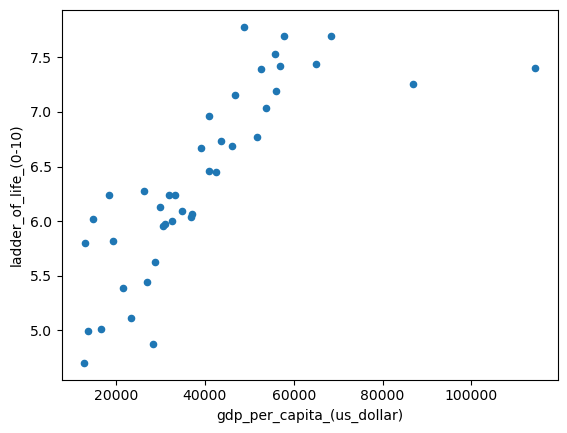

In [47]:
#iris[["petal_length","petal_width"]].plot(kind="scatter", x= "petal_length", y = "petal_width");
df_hpi_2019[["ladder_of_life_(0-10)","gdp_per_capita_(us_dollar)"]].plot(kind="scatter", x="gdp_per_capita_(us_dollar)", y="ladder_of_life_(0-10)");